# Lab09

This lab involves:
1. Generate assembly statistics
2. Identify the taxon from which the genome originated
3. Genome annotation
4. Research and write-up

## 1. Generate assembly statistics
### Calculated statistics on contigs 

Commands ran on terminal:
```
assembly-stats yin_chen_lab08/contigs.fasta
```

Output on terminal:
```
stats for yin_chen_lab08/contigs.fasta
sum = 6678635, n = 176, ave = 37946.79, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81286, n = 30
N100 = 128, n = 176
N_count = 0
Gaps = 0
```

Total length of all contigs= 6678635
Number of contigs= 176
N50= 234690

### Calculated statistics on scaffolds

Commands ran on terminal:
```
assembly-stats yin_chen_lab08/scaffolds.fasta
```

Output on terminal:


```
stats for yin_chen_lab08/scaffolds.fasta
sum = 6678655, n = 174, ave = 38383.07, largest = 414008
N50 = 234690, n = 11
N60 = 202142, n = 14
N70 = 154232, n = 18
N80 = 103367, n = 23
N90 = 81821, n = 30
N100 = 128, n = 174
N_count = 20
Gaps = 2
```

Total length of all scaffolds= 6678655
Number of scaffolds= 174
N50= 234690

### Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length?
The N50 is defined as the minimum contig length needed to cover 50% of the genome, which can be used to evaluate the quality of the assembly. An overly small N50 will suggest that you were unable to generate many contigs of biologically meaningful size- for example, contigs that are too short to be useful and unable to connect with other contigs to form a scaffold. 

It is more useful that mean because mean will be biased by the outliers' length- length of the extremely long or short contigs, which can be present as contigs are just collapsing of overlapping sequences, which can have extreme lengths depending on the cut DNA fragments. It is also more useful than median because it is not affected by the number of contigs present for each length.

In my assembly, scaffolds are approximately equal to contigs.

###  Histogram of coverage for all contigs in my assembly

In [67]:
#Extracting coverage from contigs.fasta
found = False
coverage= []
with open("contigs.fasta") as openfile:
     for line in openfile:
         if not found:
             counter = 0
             for part in line.split():
                  counter = counter + 1
                  if "_cov_" in part:
                     print(part)
                     a=part.split("_cov_")
                     coverage.append(float(a[1]))
found = True

>NODE_1_length_414008_cov_7.740928
>NODE_2_length_378948_cov_10.006665
>NODE_3_length_360689_cov_7.539874
>NODE_4_length_332509_cov_9.114046
>NODE_5_length_327223_cov_9.241629
>NODE_6_length_298784_cov_8.918606
>NODE_7_length_297812_cov_8.126053
>NODE_8_length_273249_cov_8.706677
>NODE_9_length_261613_cov_7.455302
>NODE_10_length_235234_cov_7.139043
>NODE_11_length_234690_cov_8.642510
>NODE_12_length_213896_cov_7.910328
>NODE_13_length_207869_cov_6.973549
>NODE_14_length_202142_cov_8.264545
>NODE_15_length_198699_cov_7.418715
>NODE_16_length_177897_cov_8.846256
>NODE_17_length_167686_cov_8.577110
>NODE_18_length_154232_cov_9.584186
>NODE_19_length_148556_cov_8.773953
>NODE_20_length_145425_cov_7.418265
>NODE_21_length_135414_cov_7.113839
>NODE_22_length_124085_cov_8.039997
>NODE_23_length_103367_cov_10.081286
>NODE_24_length_102993_cov_7.785886
>NODE_25_length_101937_cov_7.854012
>NODE_26_length_101718_cov_8.146401
>NODE_27_length_92094_cov_7.136158
>NODE_28_length_83515_cov_8.555536
>

[7.740928, 10.006665, 7.539874, 9.114046, 9.241629, 8.918606, 8.126053, 8.706677, 7.455302, 7.139043, 8.64251, 7.910328, 6.973549, 8.264545, 7.418715, 8.846256, 8.57711, 9.584186, 8.773953, 7.418265, 7.113839, 8.039997, 10.081286, 7.785886, 7.854012, 8.146401, 7.136158, 8.555536, 7.722379, 9.311795, 8.238385, 9.074883, 7.372789, 7.420957, 6.46957, 8.116505, 7.61281, 7.993083, 7.424264, 7.895898, 7.608171, 7.601905, 7.314205, 8.45544, 14.119172, 10.363252, 5.239566, 7.030905, 5.388827, 0.708005, 9.625, 6.539275, 0.427495, 4.630975, 0.934599, 0.812236, 0.803797, 6.890063, 0.900634, 0.898649, 8.990244, 0.98005, 0.97878, 0.929919, 0.937669, 0.834688, 0.9375, 0.923706, 0.937158, 0.958217, 0.958217, 0.944134, 1.002801, 0.72191, 0.974576, 0.977337, 0.864023, 0.982906, 0.985714, 0.933526, 0.742775, 0.94186, 1.008772, 0.918129, 1.008798, 0.692082, 0.970588, 1.02071, 0.946588, 0.952381, 1.026866, 0.855856, 1.638554, 1.039275, 1.021148, 0.740181, 1.045455, 0.936364, 0.681818, 0.772036, 0.929664, 

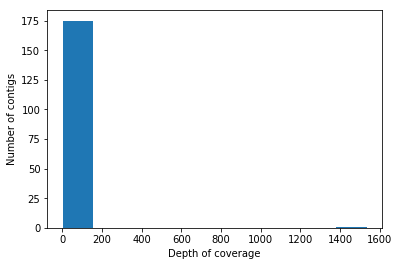

<Figure size 7200x7200 with 0 Axes>

14.047804437500002

In [99]:
# histogram of coverage
import numpy as np
import matplotlib.pyplot as plt

print(coverage)

plt.hist(coverage)
plt.ylabel('Number of contigs') 
plt.xlabel('Depth of coverage') 
plt.figure(figsize=(100,100))
plt.show()

np.mean(coverage)

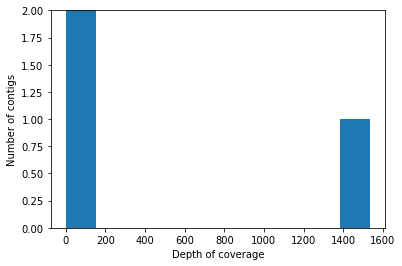

<Figure size 7200x7200 with 0 Axes>

14.047804437500002
1536.0


In [103]:
#If we zoom in to look more closely at the 2nd peak
# histogram of coverage
import numpy as np
import matplotlib.pyplot as plt

plt.hist(coverage)
plt.ylabel('Number of contigs') 
plt.xlabel('Depth of coverage') 
plt.ylim([0,2])
plt.figure(figsize=(100,100))
plt.show()

#Largest contig coverage
print(np.mean(coverage))

#Men contig length
print(np.max(coverage))

There are two peaks, eventhough the peaks seem to far from each other with no data between them to be considered Gaussian bimodal. The smaller peak may be influced by the presence of a particular contig which has the longest length - 1536. The coverage is not uniformly distributed, with the mode of depth of coverage between 0 and 200. Moreover, the mean length of coverage is 14, and the presence of contigs with coverage an integer multiple of the mean coverage may be due to many contigs containing repetitive sequences.

## 2. Identify the taxon from which my genome originated

### Locating rRNA genes
Command ran on terminal:
```
rna_hmm3.py -i yin_chen_lab08/contigs.fasta -o yin_chen_lab08/contigs.GFF
```
A file in GFF format was created in the directory. When this program completes, all lines within other than those containing 16S_rRNA genes were deleted in contigs.GFF.


### Extract nucleic acid sequences of the 16S rRNA genes from my assembly
Command ran on terminal:
```
bedtools getfasta -fi yin_chen_lab08/contigs.fasta -bed yin_chen_lab08/contigs.GFF
```
Output on terminal:
```
index file yin_chen_lab08/contigs.fasta.fai not found, generating...
>NODE_23_length_103367_cov_10.081286:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_18_length_154232_cov_9.584186:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_5_length_327223_cov_9.241629:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_6_length_298784_cov_8.918606:13925-15470
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
>NODE_4_length_332509_cov_9.114046:137011-138556
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA
>NODE_2_length_378948_cov_10.006665:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA
```

### Identify the 16S sequences on [Ribosomal Database Project’s SeqMatch](https://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp)
The 16S sequences were copied and pasted into the search window one at a time. The program tried to identify the 16S sequences as precisely as possible by comparing them to a database of high-quality, curated sequences, obtained from known bacteria. For the 16S sequences I submitted, all of them found to be in the following identification:

domain Bacteria  
          phylum "Proteobacteria"  
             class Gammaproteobacteria  
                order Pseudomonadales  
                   family Pseudomonadaceae  
                      genus _Pseudomonas_

I had come to this conclusion because all 6 sequences above gave the exact same identification by the program.
                    

## 3. Genome Annotation
Using programs that can break the long genome sequence into genes, the genes' function can be predicted by comparing orthologs with known function in other, more well-studied genomes. In this lab, this is done using two genome-annotation services: **RAST** and **BASys**. After registering online(with **RAST**) and uploading the genome's fasta file, it took some time before notifying the genome annotation was done. 

The annotation by **BASys** can be seen [here](https://www.basys.ca/server3/basys/cache/849d5643d9b05c46d0f0f5b20c9c548a/index.html). While for **RAST**, since I have my own account the genome annotation can't be shown directly with a hyperlink.

In the annotation of both services, I am presented with a table that shows the roles of genes identified and what biological systems in the cell they are part of. For example, gene for 3-ketoacyl-CoA thiolase was identified, it is part of the biotin synthesis pathway in _Pseudomonas_.

## 4. Research and write-up - _Pseudomonas_

_Pseudomonas_ is a genus of Gram-negative bacteria that can be found at a lot of places esepcially water and soil. The sequenced genome contains genes for many metabolic pathways, such as the fundamental pathways - glycolysis, citric acid cycle and production of vitamins(i.e. riboflavin). The bacteria also shows evidence for being able to live anaerobically, because it contains genes for proteins such as nitrate reductase, allowing it to use nitrate as an electron acceptor during anaerobic respiration. Moreover, it also contains genes that produces siderophore and its receptor, which means that the bacteria is adapted to live in regions with low iron concentrations, this can also gives it advantage to survive in human blood. Moreover, the genome encodes enzymes that gives the bacteria resistance against many metals and such as copper, cobalt, copper, and chromium. This may suggest that the bacteria is adapted to live in places with high metal concentrations such as in the mines.

The genome does encode known antibiotic resistance genes. This includes several multidrug-resistace proteins' genes, and also beta-lactamase gene which can break down penicillin, giving it penicillin-resistance; and Fosfomycin resistance protein FosA gene, giving it resistance to the drug Fosfomycin normally used to treat urinary tract infections. 

Moreover, it encodes genes for Multidrug Resistance Efflux Pumps, such as the ones of MATE family of MDR efflux pumps and efflux pump YdhE/NorM. These efflux pumps actively export antibiotics and drugs that entered the bacteria back outside, faster than their entry. Therefore, gives _Pseudomonas_ multiple-drug-resistance, such as penicillin, ceftriaxone, azithromycin, tetracycline, and solithromycin. [1] In addition to that, the genome reveals genes for HigB-(HigA)2-HigB toxin-antitoxin complex, which regulates pathogenicity in the bacteria. For example, the HigB/HigA toxin/antitoxin system of _Pseudomonas aeruginosa_ influences the virulence factors pyochelin, pyocyanin, and biofilm formation.[2]

With the conclusion above, there is a possibility that the _Pseudomonas_ bacteria's genome which I sequence is a human pathogen **using the genome and my research as evidence**. The genome contains genes for Type VI secretion system, which is an apparatus used by bacteria to inject proteins into target cell, which can be prokaryotic or eukaryoyic. Thus it is highly associated with bacterial pathogenesis and host cell survival. However, it may not be a strict human pathogen, because there has been evidence of Type VI secretion system function more primarily in interactions between bacteria, such as mediating horizontal gene transfer. 

One interesting annotation is that the genome contains genes associated with phages such as Phage tail proteins and Phage DNA synthesis. This suggest that the _Pseudomonas_ colony was under phage's attack before and their genetic material were integrated into _Pseudomonas_'s genome.

References:

[1]Golparian, D., Shafer, W., Ohnishi, M. and Unemo, M. (2014). Importance of Multidrug Efflux Pumps in the Antimicrobial Resistance Property of Clinical Multidrug-Resistant Isolates of Neisseria gonorrhoeae. Antimicrobial Agents and Chemotherapy, 58(6), pp.3556-3559.

[2]Wood, T. and Wood, T. (2016). The HigB/HigA toxin/antitoxin system of Pseudomonas aeruginosa influences the virulence factors pyochelin, pyocyanin, and biofilm formation. MicrobiologyOpen, 5(3), pp.499-511.